<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/Lottery_Prediction_model_LSTM_(-1)(100)(0.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PrepareDATA

Link: https://medium.com/@polanitzer/forecasting-the-next-winning-numbers-in-the-texas-lottery-mega-millions-drawing-using-a-deep-4c37ee6d30f0

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery 30_9 19 2024.csv')

In [5]:
lotto = lotto.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [6]:
lotto

,DATE,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,9/16/2024,608662,62,662,37,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2024,199606,6,606,94,NaN,NaN,NaN,NaN,NaN,NaN
2,8/16/2024,95867,67,867,28,NaN,NaN,NaN,NaN,NaN,NaN
3,8/1/2024,407041,41,41,46,NaN,NaN,NaN,NaN,NaN,NaN
4,7/16/2024,367336,36,336,21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
725,5/16/1994,2071764,64,764,29,93.0,544.0,535.0,746.0,2.0,Monday
726,5/2/1994,3072877,77,877,69,535.0,317.0,170.0,521.0,2.0,Monday
727,4/16/1994,7893913,13,913,21,785.0,982.0,151.0,594.0,7.0,Saturday
728,4/1/1994,4269815,15,815,29,675.0,35.0,704.0,868.0,6.0,Friday


In [7]:
lotto.rename(columns={'DATE': 'Date','รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [8]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,9/16/2024,608662,62,662,37,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2024,199606,6,606,94,NaN,NaN,NaN,NaN,NaN,NaN
2,8/16/2024,95867,67,867,28,NaN,NaN,NaN,NaN,NaN,NaN
3,8/1/2024,407041,41,41,46,NaN,NaN,NaN,NaN,NaN,NaN
4,7/16/2024,367336,36,336,21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
725,5/16/1994,2071764,64,764,29,93.0,544.0,535.0,746.0,2.0,Monday
726,5/2/1994,3072877,77,877,69,535.0,317.0,170.0,521.0,2.0,Monday
727,4/16/1994,7893913,13,913,21,785.0,982.0,151.0,594.0,7.0,Saturday
728,4/1/1994,4269815,15,815,29,675.0,35.0,704.0,868.0,6.0,Friday


In [9]:
ls= lotto.iloc[:,9:11]

In [10]:
lu= lotto.iloc[:,0:5]

In [11]:
lt = pd.concat([lu, ls], axis=1)

In [12]:
lt

,Date,1st,2 ตัวบน,top3,up2,weekday_dum,weekday
0,9/16/2024,608662,62,662,37,NaN,NaN
1,9/1/2024,199606,6,606,94,NaN,NaN
2,8/16/2024,95867,67,867,28,NaN,NaN
3,8/1/2024,407041,41,41,46,NaN,NaN
4,7/16/2024,367336,36,336,21,NaN,NaN
...,...,...,...,...,...,...,...
725,5/16/1994,2071764,64,764,29,2.0,Monday
726,5/2/1994,3072877,77,877,69,2.0,Monday
727,4/16/1994,7893913,13,913,21,7.0,Saturday
728,4/1/1994,4269815,15,815,29,6.0,Friday


In [13]:
lt = lt.drop(columns=['2 ตัวบน'])

In [14]:
more = lt[lt['1st'] >= 999999]
more.count()

,0
Date,20
1st,20
top3,20
up2,20
weekday_dum,20
weekday,20


In [15]:
lt = lt[lt['1st'] <= 999999]

In [16]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

In [17]:
lt['top3'] = lt['top3'].apply(lambda x: '{:03}'.format(x))

In [18]:
lt['Date'] = pd.to_datetime(lt['Date'])

In [19]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [20]:
lt_1 = lt.copy()

In [21]:
lt_1['up2'] = lt_1['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['Tens digit'] = lt_1['up2'].apply(lambda x: int(x[0]))
lt_1['Units digit'] = lt_1['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [22]:
lt_1['top3'] = lt_1['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['c3_r1'] = lt_1['top3'].apply(lambda x: int(x[0]))
lt_1['c3_r2'] = lt_1['top3'].apply(lambda x: int(x[1]))
lt_1['c3_r3'] = lt_1['top3'].apply(lambda x: int(x[2]))

In [23]:
lt_2 = lt_1.copy()

# LSTM Model

In [24]:
lt_2

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-09-16,608662,662,37,NaN,NaN,2024,9,16,3,7,6,6,2
1,2024-09-01,199606,606,94,NaN,NaN,2024,9,1,9,4,6,0,6
2,2024-08-16,95867,867,28,NaN,NaN,2024,8,16,2,8,8,6,7
3,2024-08-01,407041,041,46,NaN,NaN,2024,8,1,4,6,0,4,1
4,2024-07-16,367336,336,21,NaN,NaN,2024,7,16,2,1,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1995-03-16,646847,847,67,5.0,Thursday,1995,3,16,6,7,8,4,7
706,1995-03-01,411454,454,71,4.0,Wednesday,1995,3,1,7,1,4,5,4
707,1995-02-16,869070,070,95,5.0,Thursday,1995,2,16,9,5,0,7,0
708,1995-02-01,198162,162,48,4.0,Wednesday,1995,2,1,4,8,1,6,2


In [25]:
sh = lt_2.shape

In [26]:
z = 1

In [27]:
lt_3 = lt_2.iloc[z:sh[0], 0:sh[1]]

In [28]:
lt_3

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
1,2024-09-01,199606,606,94,NaN,NaN,2024,9,1,9,4,6,0,6
2,2024-08-16,95867,867,28,NaN,NaN,2024,8,16,2,8,8,6,7
3,2024-08-01,407041,041,46,NaN,NaN,2024,8,1,4,6,0,4,1
4,2024-07-16,367336,336,21,NaN,NaN,2024,7,16,2,1,3,3,6
5,2024-07-01,434503,503,89,NaN,NaN,2024,7,1,8,9,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1995-03-16,646847,847,67,5.0,Thursday,1995,3,16,6,7,8,4,7
706,1995-03-01,411454,454,71,4.0,Wednesday,1995,3,1,7,1,4,5,4
707,1995-02-16,869070,070,95,5.0,Thursday,1995,2,16,9,5,0,7,0
708,1995-02-01,198162,162,48,4.0,Wednesday,1995,2,1,4,8,1,6,2


## ไม่ล่วงหน้า

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [30]:
dfp = lt_3.copy()

In [31]:
df = dfp.reset_index()

In [32]:
df

,index,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,1,2024-09-01,199606,606,94,NaN,NaN,2024,9,1,9,4,6,0,6
1,2,2024-08-16,95867,867,28,NaN,NaN,2024,8,16,2,8,8,6,7
2,3,2024-08-01,407041,041,46,NaN,NaN,2024,8,1,4,6,0,4,1
3,4,2024-07-16,367336,336,21,NaN,NaN,2024,7,16,2,1,3,3,6
4,5,2024-07-01,434503,503,89,NaN,NaN,2024,7,1,8,9,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,705,1995-03-16,646847,847,67,5.0,Thursday,1995,3,16,6,7,8,4,7
705,706,1995-03-01,411454,454,71,4.0,Wednesday,1995,3,1,7,1,4,5,4
706,707,1995-02-16,869070,070,95,5.0,Thursday,1995,2,16,9,5,0,7,0
707,708,1995-02-01,198162,162,48,4.0,Wednesday,1995,2,1,4,8,1,6,2


In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [34]:
df2 = df.copy()

In [35]:
df1 = df.copy()
df.drop(['index','Date','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

number_of_features = df.shape[1]

In [36]:
df

,top3,up2
0,606,94
1,867,28
2,041,46
3,336,21
4,503,89
...,...,...
704,847,67
705,454,71
706,070,95
707,162,48


In [37]:
df1.drop(['index','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

In [38]:
df1

,Date,top3,up2
0,2024-09-01,606,94
1,2024-08-16,867,28
2,2024-08-01,041,46
3,2024-07-16,336,21
4,2024-07-01,503,89
...,...,...,...
704,1995-03-16,847,67
705,1995-03-01,454,71
706,1995-02-16,070,95
707,1995-02-01,162,48


In [39]:
อ

NameError: name 'อ' is not defined

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# ==================== ฟังก์ชันช่วยสำหรับการทำนายล็อตเตอรี่ ====================

def create_window_samples(data, window_length, features):
    """สร้างตัวอย่างข้อมูลในรูปแบบ window สำหรับโมเดล LSTM"""
    total_rows = data.shape[0]

    # สร้าง samples แยกตามคอลัมน์
    x_samples = {}
    y_samples = {}

    for feature in features:
        x_samples[feature] = np.empty([total_rows - window_length, window_length, 1], dtype=float)
        y_samples[feature] = np.empty([total_rows - window_length, 1], dtype=float)

        for i in range(total_rows - window_length):
            # ใช้ .values.reshape(-1, 1) เพื่อให้เป็น 2D array ที่มี 1 คอลัมน์
            x_samples[feature][i] = data.iloc[i:i+window_length][feature].values.reshape(-1, 1)
            y_samples[feature][i] = data.iloc[i+window_length:i+window_length+1][feature].values.reshape(-1, 1)

    return x_samples, y_samples

def build_lstm_model(window_length, output_dim=1):
    """สร้างโมเดล LSTM สำหรับการทำนายตัวเลข"""
    model = Sequential()

    # เลเยอร์แรก
    model.add(Bidirectional(LSTM(120,
                        input_shape=(window_length, 1),
                        return_sequences=True)))
    model.add(Dropout(0.2))

    # เลเยอร์ที่สอง
    model.add(Bidirectional(LSTM(120, return_sequences=False)))
    model.add(Dropout(0.2))

    # เลเยอร์เอาท์พุต
    model.add(Dense(60))
    model.add(Dense(output_dim))

    # คอมไพล์โมเดล
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

    return model

# ==================== โมเดลการสุ่มแบบต่างๆ ====================

def random_uniform_model(lottery_range, num_digits):
    """สุ่มเลขล็อตเตอรี่แบบสม่ำเสมอ (uniform)"""
    # ช่วงของเลขขึ้นอยู่กับจำนวนหลัก
    max_val = 10**num_digits - 1  # เช่น 3 หลัก = 999, 2 หลัก = 99

    # สุ่มเลข
    result = np.random.randint(0, max_val + 1)

    # แปลงเป็นรูปแบบที่มี leading zeros ถ้าจำเป็น
    return str(result).zfill(num_digits)

def frequency_based_model(historical_data, num_digits):
    """สุ่มเลขโดยอิงความถี่ของการออกในอดีต"""
    # แปลงให้เป็นตัวเลขก่อน
    numeric_data = []
    for item in historical_data:
        try:
            if isinstance(item, (str, np.str_)):
                numeric_data.append(int(item))
            else:
                numeric_data.append(int(item))
        except (ValueError, TypeError):
            # ข้ามข้อมูลที่แปลงไม่ได้
            pass

    # ถ้าไม่มีข้อมูลที่ใช้ได้ ให้สุ่มแบบปกติ
    if not numeric_data:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # แปลงเป็นรูปแบบ string ที่มี leading zeros
    str_data = [str(num).zfill(num_digits) for num in numeric_data]

    # นับความถี่
    max_val = 10**num_digits
    frequency = np.zeros(max_val)

    for number_str in str_data:
        try:
            number = int(number_str)
            if 0 <= number < max_val:  # ป้องกันข้อมูลผิดพลาด
                frequency[number] += 1
        except (ValueError, TypeError):
            # ข้ามข้อมูลที่แปลงไม่ได้
            pass

    # ถ้าไม่มีข้อมูลความถี่ ให้ใช้การกระจายแบบสม่ำเสมอ
    if np.sum(frequency) == 0:
        probabilities = np.ones(max_val) / max_val
    else:
        # สร้างความน่าจะเป็นจากความถี่
        probabilities = frequency / np.sum(frequency)

    # สุ่มตัวเลขตามความน่าจะเป็น
    result = np.random.choice(
        range(max_val),
        size=1,
        p=probabilities
    )[0]

    # แปลงเป็นรูปแบบที่มี leading zeros
    return str(result).zfill(num_digits)

def hot_number_model(historical_data, num_digits, lookback=10):
    """เลือกเฉพาะตัวเลขที่ออกบ่อยในช่วง lookback ล่าสุด"""
    # ใช้ข้อมูล lookback ล่าสุด หรือทั้งหมดถ้ามีน้อยกว่า
    lookback = min(lookback, len(historical_data))

    if lookback == 0:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # แปลงให้เป็นตัวเลขก่อน
    numeric_data = []
    for item in historical_data[-lookback:]:
        try:
            if isinstance(item, (str, np.str_)):
                numeric_data.append(int(item))
            else:
                numeric_data.append(int(item))
        except (ValueError, TypeError):
            # ข้ามข้อมูลที่แปลงไม่ได้
            pass

    # ถ้าไม่มีข้อมูลที่ใช้ได้ ให้สุ่มแบบปกติ
    if not numeric_data:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # แปลงเป็นรูปแบบ string ที่มี leading zeros
    str_data = [str(num).zfill(num_digits) for num in numeric_data]

    # นับความถี่
    unique, counts = np.unique(str_data, return_counts=True)

    if len(unique) == 0:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # เรียงลำดับตามความถี่จากมากไปน้อย
    sorted_indices = np.argsort(-counts)
    # เลือกตัวเลขที่ออกบ่อยที่สุด
    result = unique[sorted_indices[0]]

    return result

def moving_average_prediction(historical_data, num_digits, window_size=5):
    """ทำนายโดยใช้ค่าเฉลี่ยเคลื่อนที่ของตัวเลขที่ออก"""
    # ใช้ข้อมูล window_size ล่าสุด หรือทั้งหมดถ้ามีน้อยกว่า
    window_size = min(window_size, len(historical_data))

    if window_size == 0:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # ตรวจสอบให้แน่ใจว่า historical_data เป็นตัวเลข
    numeric_data = []
    for item in historical_data[-window_size:]:
        if isinstance(item, (str, np.str_)):
            try:
                numeric_data.append(int(item))
            except (ValueError, TypeError):
                # ถ้าแปลงไม่ได้ ให้สุ่มแทน
                return random_uniform_model(10**num_digits - 1, num_digits)
        else:
            numeric_data.append(int(item))

    if not numeric_data:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # คำนวณค่าเฉลี่ย
    avg = np.mean(numeric_data)
    # ปัดเป็นจำนวนเต็ม
    result = int(round(avg)) % (10**num_digits)

    # แปลงเป็นรูปแบบที่มี leading zeros
    return str(result).zfill(num_digits)

# ==================== ฟังก์ชันสำหรับ Walk-Forward Validation ====================

def evaluate_prediction(y_true, y_pred, num_digits):
    """คำนวณค่า metrics หลายตัวสำหรับการเปรียบเทียบ"""
    # แปลงเป็นรูปแบบที่เหมือนกัน
    if isinstance(y_true, (int, float, np.number)):
        y_true = int(y_true)
        y_true_str = str(y_true).zfill(num_digits)
    else:
        y_true_str = str(y_true)

    if isinstance(y_pred, (int, float, np.number)):
        y_pred = int(y_pred)
        y_pred_str = str(y_pred).zfill(num_digits)
    else:
        y_pred_str = str(y_pred)

    # คำนวณความผิดพลาด
    y_true_int = int(y_true_str)
    y_pred_int = int(y_pred_str)

    mse = (y_true_int - y_pred_int)**2
    rmse = np.sqrt(mse)
    mae = abs(y_true_int - y_pred_int)

    # นับจำนวนตัวเลขที่ถูกต้อง
    correct_digits = sum(t == p for t, p in zip(y_true_str, y_pred_str))

    # คำนวณความแม่นยำตามตำแหน่ง
    position_accuracy = correct_digits / num_digits if num_digits > 0 else 0

    # คำนวณความแม่นยำแบบสมบูรณ์ (ถูกทั้งหมดหรือไม่)
    absolute_accuracy = 1 if y_true_str == y_pred_str else 0

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': 0,  # ไม่เหมาะสมกับการทำนายเลขล็อตเตอรี่
        'correct_digits': correct_digits,
        'position_accuracy': position_accuracy,
        'absolute_accuracy': absolute_accuracy
    }

def walk_forward_validation(df, window_length, features):
    """ทำ walk-forward validation สำหรับชุดโมเดลทำนายล็อตเตอรี่"""
    # กำหนดขนาดชุดข้อมูลฝึกสอนเริ่มต้น (ใช้ 70% แรก)
    train_size = int(len(df) * 0.7)
    test_size = len(df) - train_size

    # เตรียมพื้นที่สำหรับเก็บผลลัพธ์
    results = {}

    for feature in features:
        results[feature] = {
            'lstm': [],
            'uniform_random': [],
            'frequency_based': [],
            'hot_number': [],
            'moving_average': []
        }

    actual_values = {feature: [] for feature in features}  # เก็บค่าจริง
    predictions = {feature: {model: [] for model in results[features[0]].keys()} for feature in features}  # เก็บค่าทำนาย

    print(f"เริ่มต้น Walk-Forward Validation: ชุดทดสอบ {test_size} ตัวอย่าง")

    # วนลูปทำ walk-forward validation
    for i in range(test_size):
        current_train_end = train_size + i
        current_test_idx = current_train_end

        # ข้อมูลฝึกสอนปัจจุบัน
        train_data = df.iloc[:current_train_end].copy()

        # ค่าจริงที่ต้องทำนาย
        actual_draw = df.iloc[current_test_idx].copy()

        for feature in features:
            # แปลงเป็นตัวเลขก่อนเก็บ
            try:
                actual_values[feature].append(int(actual_draw[feature]))
            except (ValueError, TypeError):
                actual_values[feature].append(0)  # ถ้าแปลงไม่ได้ให้ใช้ 0

        print(f"ทดสอบตัวอย่างที่ {i+1}/{test_size}: ใช้ข้อมูล {len(train_data)} แถวในการเทรน")

        # ทำนายแยกตามแต่ละคอลัมน์ (top3, up2)
        for feature in features:
            # ตรวจสอบจำนวนหลักของตัวเลข
            if feature == 'top3':
                num_digits = 3
            elif feature == 'up2':
                num_digits = 2
            else:
                # ถ้าเป็นคอลัมน์อื่น ให้ตรวจสอบจากค่าสูงสุด
                max_val = train_data[feature].max()
                num_digits = len(str(max_val))

            # ============= โมเดล LSTM =============
            # สเกลข้อมูล
            scaler = StandardScaler()
            train_scaled = scaler.fit_transform(train_data[[feature]].values)
            train_scaled_df = pd.DataFrame(train_scaled, index=train_data.index, columns=[feature])

            # สร้าง window samples สำหรับการเทรน
            x_samples, y_samples = create_window_samples(train_scaled_df, window_length, [feature])

            x_train = x_samples[feature]
            y_train = y_samples[feature]

            if len(x_train) > 0:  # ตรวจสอบว่ามีข้อมูลพอสำหรับการเทรน
                # สร้างและเทรนโมเดล LSTM
                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                lstm_model = build_lstm_model(window_length)
                lstm_model.fit(
                    x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=0
                )

                # เตรียมข้อมูลสำหรับการทำนาย
                x_test = train_scaled_df.iloc[-window_length:][feature].values.reshape(1, window_length, 1)

                # ทำนายด้วยโมเดล LSTM
                lstm_pred_scaled = lstm_model.predict(x_test, verbose=0)[0][0]
                lstm_pred = scaler.inverse_transform([[lstm_pred_scaled]])[0][0]
                # ปัดเป็นจำนวนเต็มและจำกัดให้อยู่ในช่วงที่ถูกต้อง
                lstm_pred = int(round(lstm_pred)) % (10**num_digits)
                lstm_pred_str = str(lstm_pred).zfill(num_digits)
            else:
                # ถ้าข้อมูลไม่พอเทรน ให้ใช้การสุ่มแทน
                lstm_pred_str = random_uniform_model(10**num_digits - 1, num_digits)

            predictions[feature]['lstm'].append(lstm_pred_str)

            # ============= โมเดลการสุ่มแบบต่างๆ =============
            # สุ่มแบบสม่ำเสมอ
            uniform_pred = random_uniform_model(10**num_digits - 1, num_digits)
            predictions[feature]['uniform_random'].append(uniform_pred)

            # สุ่มตามความถี่
            freq_pred = frequency_based_model(train_data[feature].values, num_digits)
            predictions[feature]['frequency_based'].append(freq_pred)

            # สุ่มตามตัวเลขฮอต
            hot_pred = hot_number_model(train_data[feature].values, num_digits)
            predictions[feature]['hot_number'].append(hot_pred)

            # ทำนายด้วยค่าเฉลี่ยเคลื่อนที่
            ma_pred = moving_average_prediction(train_data[feature].values, num_digits)
            predictions[feature]['moving_average'].append(ma_pred)

            # ประเมินผลการทำนายของแต่ละโมเดล
            for model_name in results[feature].keys():
                eval_result = evaluate_prediction(actual_draw[feature], predictions[feature][model_name][-1], num_digits)
                results[feature][model_name].append(eval_result)

    # แปลงผลลัพธ์เป็น DataFrame สำหรับวิเคราะห์
    results_df = {}
    for feature in features:
        results_df[feature] = {}
        for model_name, model_results in results[feature].items():
            model_metrics = {}
            for metric in ['mse', 'rmse', 'mae', 'correct_digits', 'position_accuracy', 'absolute_accuracy']:
                model_metrics[metric] = [result[metric] for result in model_results]
            results_df[feature][model_name] = pd.DataFrame(model_metrics)

    actual_values = {feature: np.array(vals) for feature, vals in actual_values.items()}
    predictions = {feature: {model: np.array(preds) for model, preds in model_preds.items()}
                   for feature, model_preds in predictions.items()}

    return results_df, actual_values, predictions

# ==================== ฟังก์ชันสำหรับการทำนายงวดถัดไป ====================

def predict_next_draw(df, window_length, features):
    """ทำนายผลล็อตเตอรี่งวดถัดไปโดยใช้โมเดลต่างๆ"""
    predictions = {feature: {} for feature in features}

    # ทำนายแยกตามแต่ละคอลัมน์ (top3, up2)
    for feature in features:
        # ตรวจสอบจำนวนหลักของตัวเลข
        if feature == 'top3':
            num_digits = 3
        elif feature == 'up2':
            num_digits = 2
        else:
            # ถ้าเป็นคอลัมน์อื่น ให้ตรวจสอบจากค่าสูงสุด
            max_val = df[feature].max()
            num_digits = len(str(max_val))

        # ============= โมเดล LSTM =============
        # สเกลข้อมูลทั้งหมด
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df[[feature]].values)
        data_scaled_df = pd.DataFrame(data_scaled, index=df.index, columns=[feature])

        # สร้าง window samples สำหรับเทรนโมเดล LSTM
        x_samples, y_samples = create_window_samples(data_scaled_df, window_length, [feature])

        # สร้างและเทรนโมเดล LSTM
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lstm_model = build_lstm_model(window_length)
        lstm_model.fit(
            x_samples[feature], y_samples[feature],
            epochs=100,  # เพิ่มจำนวน epochs เพื่อให้โมเดลซับซ้อนเรียนรู้ได้ดีขึ้น
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )

        # เตรียมข้อมูลสำหรับการทำนาย
        x_next = data_scaled_df.iloc[-window_length:][feature].values.reshape(1, window_length, 1)

        # ทำนายด้วยโมเดล LSTM
        lstm_pred_scaled = lstm_model.predict(x_next, verbose=0)[0][0]
        lstm_pred = scaler.inverse_transform([[lstm_pred_scaled]])[0][0]
        # ปัดเป็นจำนวนเต็มและจำกัดให้อยู่ในช่วงที่ถูกต้อง
        lstm_pred = int(round(lstm_pred)) % (10**num_digits)
        lstm_pred_str = str(lstm_pred).zfill(num_digits)

        predictions[feature]['lstm'] = lstm_pred_str

        # ============= โมเดลการสุ่มแบบต่างๆ =============
        # สุ่มแบบสม่ำเสมอ
        predictions[feature]['uniform_random'] = random_uniform_model(10**num_digits - 1, num_digits)

        # สุ่มตามความถี่
        predictions[feature]['frequency_based'] = frequency_based_model(df[feature].values, num_digits)

        # สุ่มตามตัวเลขฮอต
        predictions[feature]['hot_number'] = hot_number_model(df[feature].values, num_digits)

        # ทำนายด้วยค่าเฉลี่ยเคลื่อนที่
        predictions[feature]['moving_average'] = moving_average_prediction(df[feature].values, num_digits)

    return predictions

# ==================== ฟังก์ชันสำหรับการวิเคราะห์และแสดงผล ====================

def analyze_results(results_df, actual_values, predictions, features):
    """วิเคราะห์ผลการทำนายจากแต่ละโมเดล"""
    print("\n============= สรุปผลการทำนาย =============")

    summary = {}

    for feature in features:
        print(f"\n----- ผลการทำนาย {feature} -----")

        # แสดงค่าเฉลี่ยของแต่ละ metric
        print("\nค่าเฉลี่ยของแต่ละ metric:")
        feature_summary = pd.DataFrame({
            model: {
                'MSE': df['mse'].mean(),
                'RMSE': df['rmse'].mean(),
                'MAE': df['mae'].mean(),
                'จำนวนตัวเลขที่ทายถูก': df['correct_digits'].mean(),
                'ความแม่นยำตามตำแหน่ง': df['position_accuracy'].mean(),
                'ความแม่นยำทั้งหมด': df['absolute_accuracy'].mean(),
            }
            for model, df in results_df[feature].items()
        })
        print(feature_summary.transpose())

        summary[feature] = feature_summary

        # แสดงกราฟเปรียบเทียบประสิทธิภาพ
        plt.figure(figsize=(15, 10))

        # 1. เปรียบเทียบค่า MSE
        plt.subplot(2, 2, 1)
        for model, df in results_df[feature].items():
            plt.plot(df['mse'], label=model)
        plt.title(f'Mean Squared Error (MSE) - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('MSE')
        plt.legend()
        plt.grid(True)

        # 2. เปรียบเทียบความแม่นยำทั้งหมด
        plt.subplot(2, 2, 2)
        for model, df in results_df[feature].items():
            plt.plot(df['absolute_accuracy'], label=model)
        plt.title(f'Absolute Accuracy - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        # 3. เปรียบเทียบค่า MAE
        plt.subplot(2, 2, 3)
        for model, df in results_df[feature].items():
            plt.plot(df['mae'], label=model)
        plt.title(f'Mean Absolute Error (MAE) - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True)

        # 4. จำนวนตัวเลขที่ทายถูก
        plt.subplot(2, 2, 4)
        for model, df in results_df[feature].items():
            plt.plot(df['correct_digits'], label=model)
        plt.title(f'Number of Correct Digits - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('Correct Digits')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.savefig(f'lottery_prediction_{feature}_comparison.png')
        plt.close()

        # สร้างตารางแสดงความถี่ของการทำนายถูกแต่ละตำแหน่ง
        if feature == 'top3':
            num_digits = 3
        elif feature == 'up2':
            num_digits = 2
        else:
            max_val = max(actual_values[feature])
            num_digits = len(str(max_val))

        print(f"\nความถี่ของการทำนายถูกตามตำแหน่งสำหรับ {feature}:")

        position_frequency = {}
        for model_name, model_preds in predictions[feature].items():
            position_frequency[model_name] = np.zeros(num_digits)

            for pred, actual in zip(model_preds, actual_values[feature]):
                pred_str = str(pred).zfill(num_digits)
                actual_str = str(actual).zfill(num_digits)

                for i in range(num_digits):
                    if i < len(pred_str) and i < len(actual_str) and pred_str[i] == actual_str[i]:
                        position_frequency[model_name][i] += 1

            # แปลงเป็นเปอร์เซ็นต์
            position_frequency[model_name] = position_frequency[model_name] * 100 / len(model_preds)

            print(f"โมเดล {model_name}:")
            for i in range(num_digits):
                print(f"  ตำแหน่งที่ {i+1}: {position_frequency[model_name][i]:.2f}%")

    return summary

In [45]:
# ==================== ฟังก์ชันหลักสำหรับรันโค้ดทั้งหมด ====================

def main():
    """ฟังก์ชันหลักสำหรับรันโมเดลทำนายล็อตเตอรี่"""
    # อ่านข้อมูล
    # สมมติว่าข้อมูลอยู่ในรูปแบบที่เราเห็นในตารางตัวอย่าง
    # เปลี่ยนเป็นการอ่านจากไฟล์จริงตามที่คุณมี
    # เช่น df = pd.read_csv('lottery_data.csv')

    # # สร้างข้อมูลตัวอย่างตามที่แสดงในภาพ
    # data = {
    #     'Date': ['2024-09-01', '2024-08-16', '2024-08-01', '2024-07-16', '2024-07-01',
    #             '1995-03-16', '1995-03-01', '1995-02-16', '1995-02-01', '1995-01-16'],
    #     'top3': [606, 867, 41, 336, 503, 847, 454, 70, 162, 388],
    #     'up2': [94, 28, 46, 21, 89, 67, 71, 95, 48, 40]
    # }

    # สำหรับตัวอย่าง เราสร้างข้อมูลเพิ่มเพื่อให้มีข้อมูลมากพอสำหรับการทดสอบ
    np.random.seed(42)

    # # สร้างวันที่ต่อเนื่องจาก 1995-03-16 ถึง 2024-09-01
    # full_dates = pd.date_range(start='1995-01-16', end='2024-09-01', freq='15D')

    # # สร้างข้อมูลสุ่มสำหรับ top3 และ up2
    # full_data = {
    #     'Date': full_dates,
    #     'top3': np.random.randint(0, 1000, size=len(full_dates)),
    #     'up2': np.random.randint(0, 100, size=len(full_dates))
    # }

    # # ใส่ข้อมูลตัวอย่างที่เรามีให้ตรงกับวันที่
    # for i, date in enumerate(data['Date']):
    #     idx = full_dates.get_loc(pd.Timestamp(date)) if pd.Timestamp(date) in full_dates else -1
    #     if idx >= 0:
    #         full_data['top3'][idx] = data['top3'][i]
    #         full_data['up2'][idx] = data['up2'][i]

    df = df1.copy()
    df['top3'] = df['top3'].astype(int)
    df['up2'] = df['up2'].astype(int)
    df.set_index('Date', inplace=True)
    df.sort_index(ascending=False, inplace=True)  # เรียงจากวันที่ล่าสุดไปเก่าสุด

    print("ข้อมูลล็อตเตอรี่ตัวอย่าง:")
    print(df.head())

    # กำหนดพารามิเตอร์
    window_length = 7  # ความยาวของหน้าต่างข้อมูลที่ใช้ในการทำนาย
    features = ['top3', 'up2']  # คอลัมน์ที่ต้องการทำนาย

    # ทำ walk-forward validation
    print("\n============= เริ่มต้น Walk-Forward Validation =============")
    results_df, actual_values, predictions = walk_forward_validation(
        df, window_length, features
    )

    # ลองใช้ชุดข้อมูลเล็กลงสำหรับการทดสอบเพื่อลดเวลาประมวลผล
    # ใช้แค่ 30 ตัวอย่างล่าสุดสำหรับการทดสอบ
    small_df = df.head(50)

    # ทำ walk-forward validation บนชุดข้อมูลที่เล็กลง
    print("\n============= เริ่มต้น Walk-Forward Validation บนชุดข้อมูลทดสอบ =============")
    results_df, actual_values, predictions = walk_forward_validation(
        small_df, window_length, features
    )

    # วิเคราะห์ผลลัพธ์
    summary = analyze_results(results_df, actual_values, predictions, features)

    # ทำนายผลล็อตเตอรี่งวดถัดไปโดยใช้ข้อมูลทั้งหมด
    print("\n============= ทำนายผลล็อตเตอรี่งวดถัดไป =============")
    next_date = pd.Timestamp(df.index[0]) + pd.Timedelta(days=15)
    next_draw_predictions = predict_next_draw(df, window_length, features)

    print(f"วันที่ออกรางวัล: {next_date.strftime('%d/%m/%Y')}")
    for feature in features:
        print(f"\nทำนาย {feature}:")
        for model_name, prediction in next_draw_predictions[feature].items():
            print(f"  โมเดล {model_name}: {prediction}")

    # สรุปผล
    print("\n============= สรุปผลการเปรียบเทียบโมเดล =============")
    for feature in features:
        try:
            best_model = summary[feature].loc['ความแม่นยำทั้งหมด'].idxmax()
            print(f"\n{feature}:")
            print(f"โมเดลที่มีความแม่นยำสูงสุด: {best_model}")
            print(f"ค่าความแม่นยำเฉลี่ย: {summary[feature].loc['ความแม่นยำทั้งหมด', best_model]:.4f}")
            print(f"จำนวนตัวเลขที่ทายถูกเฉลี่ย: {summary[feature].loc['จำนวนตัวเลขที่ทายถูก', best_model]:.2f}")
        except:
            print(f"\n{feature}: ไม่สามารถหาโมเดลที่ดีที่สุดได้ - อาจต้องดูข้อมูลผลลัพธ์เพิ่มเติม")

    print("\nคำเตือน: ล็อตเตอรี่เป็นการสุ่มที่ไม่สามารถทำนายได้อย่างแม่นยำ โมเดลใดๆ ก็ไม่สามารถรับประกันผลลัพธ์ได้")

    return df, results_df, next_draw_predictions

# รันโค้ดเมื่อใช้เป็นสคริปต์หลัก
if __name__ == "__main__":
    main()

ข้อมูลล็อตเตอรี่ตัวอย่าง:
            top3  up2
Date                 
2024-09-01   606   94
2024-08-16   867   28
2024-08-01    41   46
2024-07-16   336   21
2024-07-01   503   89

============= เริ่มต้น Walk-Forward Validation =============
เริ่มต้น Walk-Forward Validation: ชุดทดสอบ 213 ตัวอย่าง
ทดสอบตัวอย่างที่ 1/213: ใช้ข้อมูล 496 แถวในการเทรน
ทดสอบตัวอย่างที่ 2/213: ใช้ข้อมูล 497 แถวในการเทรน
ทดสอบตัวอย่างที่ 3/213: ใช้ข้อมูล 498 แถวในการเทรน
ทดสอบตัวอย่างที่ 4/213: ใช้ข้อมูล 499 แถวในการเทรน
ทดสอบตัวอย่างที่ 5/213: ใช้ข้อมูล 500 แถวในการเทรน
ทดสอบตัวอย่างที่ 6/213: ใช้ข้อมูล 501 แถวในการเทรน
ทดสอบตัวอย่างที่ 7/213: ใช้ข้อมูล 502 แถวในการเทรน
ทดสอบตัวอย่างที่ 8/213: ใช้ข้อมูล 503 แถวในการเทรน
ทดสอบตัวอย่างที่ 9/213: ใช้ข้อมูล 504 แถวในการเทรน
ทดสอบตัวอย่างที่ 10/213: ใช้ข้อมูล 505 แถวในการเทรน
ทดสอบตัวอย่างที่ 11/213: ใช้ข้อมูล 506 แถวในการเทรน
ทดสอบตัวอย่างที่ 12/213: ใช้ข้อมูล 507 แถวในการเทรน
ทดสอบตัวอย่างที่ 13/213: ใช้ข้อมูล 508 แถวในการเทรน
ทดสอบตัวอย่างที่ 14/213: ใช้ข้อมูล 

KeyboardInterrupt: 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

# ==================== ฟังก์ชันช่วยสำหรับการทำนายล็อตเตอรี่ ====================

def create_window_samples(data, window_length, features):
    """สร้างตัวอย่างข้อมูลในรูปแบบ window สำหรับโมเดล LSTM"""
    total_rows = data.shape[0]

    # สร้าง samples แยกตามคอลัมน์
    x_samples = {}
    y_samples = {}

    for feature in features:
        x_samples[feature] = np.empty([total_rows - window_length, window_length, 1], dtype=float)
        y_samples[feature] = np.empty([total_rows - window_length, 1], dtype=float)

        for i in range(total_rows - window_length):
            # ใช้ .values.reshape(-1, 1) เพื่อให้เป็น 2D array ที่มี 1 คอลัมน์
            x_samples[feature][i] = data.iloc[i:i+window_length][feature].values.reshape(-1, 1)
            y_samples[feature][i] = data.iloc[i+window_length:i+window_length+1][feature].values.reshape(-1, 1)

    return x_samples, y_samples

def build_lstm_model(window_length, output_dim=1):
    """สร้างโมเดล LSTM ที่ไม่ซับซ้อนเกินไปพร้อม regularization"""
    model = Sequential()

    # ลดความซับซ้อนของโมเดลและเพิ่ม regularization
    model.add(LSTM(64,
                  input_shape=(window_length, 1),
                  return_sequences=False,
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
                  recurrent_regularizer=l1_l2(l1=0.01, l2=0.01),
                  activity_regularizer=l1_l2(l1=0.01, l2=0.01)))

    # เพิ่ม dropout ที่มากขึ้นเพื่อลด overfitting
    model.add(Dropout(0.3))

    # เลเยอร์เอาท์พุตกับ regularization
    model.add(Dense(output_dim, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

    # คอมไพล์โมเดล
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

    return model

# ==================== โมเดลการสุ่มแบบต่างๆ ====================

def random_uniform_model(lottery_range, num_digits):
    """สุ่มเลขล็อตเตอรี่แบบสม่ำเสมอ (uniform)"""
    # ช่วงของเลขขึ้นอยู่กับจำนวนหลัก
    max_val = 10**num_digits - 1  # เช่น 3 หลัก = 999, 2 หลัก = 99

    # สุ่มเลข
    result = np.random.randint(0, max_val + 1)

    # แปลงเป็นรูปแบบที่มี leading zeros ถ้าจำเป็น
    return str(result).zfill(num_digits)

def frequency_based_model(historical_data, num_digits):
    """สุ่มเลขโดยอิงความถี่ของการออกในอดีต"""
    # แปลงให้เป็นตัวเลขก่อน
    numeric_data = []
    for item in historical_data:
        try:
            if isinstance(item, (str, np.str_)):
                numeric_data.append(int(item))
            else:
                numeric_data.append(int(item))
        except (ValueError, TypeError):
            # ข้ามข้อมูลที่แปลงไม่ได้
            pass

    # ถ้าไม่มีข้อมูลที่ใช้ได้ ให้สุ่มแบบปกติ
    if not numeric_data:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # แปลงเป็นรูปแบบ string ที่มี leading zeros
    str_data = [str(num).zfill(num_digits) for num in numeric_data]

    # นับความถี่
    max_val = 10**num_digits
    frequency = np.zeros(max_val)

    for number_str in str_data:
        try:
            number = int(number_str)
            if 0 <= number < max_val:  # ป้องกันข้อมูลผิดพลาด
                frequency[number] += 1
        except (ValueError, TypeError):
            # ข้ามข้อมูลที่แปลงไม่ได้
            pass

    # ถ้าไม่มีข้อมูลความถี่ ให้ใช้การกระจายแบบสม่ำเสมอ
    if np.sum(frequency) == 0:
        probabilities = np.ones(max_val) / max_val
    else:
        # สร้างความน่าจะเป็นจากความถี่
        probabilities = frequency / np.sum(frequency)

    # สุ่มตัวเลขตามความน่าจะเป็น
    result = np.random.choice(
        range(max_val),
        size=1,
        p=probabilities
    )[0]

    # แปลงเป็นรูปแบบที่มี leading zeros
    return str(result).zfill(num_digits)

def hot_number_model(historical_data, num_digits, lookback=10):
    """เลือกเฉพาะตัวเลขที่ออกบ่อยในช่วง lookback ล่าสุด"""
    # ใช้ข้อมูล lookback ล่าสุด หรือทั้งหมดถ้ามีน้อยกว่า
    lookback = min(lookback, len(historical_data))

    if lookback == 0:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # แปลงให้เป็นตัวเลขก่อน
    numeric_data = []
    for item in historical_data[-lookback:]:
        try:
            if isinstance(item, (str, np.str_)):
                numeric_data.append(int(item))
            else:
                numeric_data.append(int(item))
        except (ValueError, TypeError):
            # ข้ามข้อมูลที่แปลงไม่ได้
            pass

    # ถ้าไม่มีข้อมูลที่ใช้ได้ ให้สุ่มแบบปกติ
    if not numeric_data:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # แปลงเป็นรูปแบบ string ที่มี leading zeros
    str_data = [str(num).zfill(num_digits) for num in numeric_data]

    # นับความถี่
    unique, counts = np.unique(str_data, return_counts=True)

    if len(unique) == 0:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # เรียงลำดับตามความถี่จากมากไปน้อย
    sorted_indices = np.argsort(-counts)
    # เลือกตัวเลขที่ออกบ่อยที่สุด
    result = unique[sorted_indices[0]]

    return result

def moving_average_prediction(historical_data, num_digits, window_size=5):
    """ทำนายโดยใช้ค่าเฉลี่ยเคลื่อนที่ของตัวเลขที่ออก"""
    # ใช้ข้อมูล window_size ล่าสุด หรือทั้งหมดถ้ามีน้อยกว่า
    window_size = min(window_size, len(historical_data))

    if window_size == 0:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # ตรวจสอบให้แน่ใจว่า historical_data เป็นตัวเลข
    numeric_data = []
    for item in historical_data[-window_size:]:
        if isinstance(item, (str, np.str_)):
            try:
                numeric_data.append(int(item))
            except (ValueError, TypeError):
                # ถ้าแปลงไม่ได้ ให้สุ่มแทน
                return random_uniform_model(10**num_digits - 1, num_digits)
        else:
            numeric_data.append(int(item))

    if not numeric_data:
        return random_uniform_model(10**num_digits - 1, num_digits)

    # คำนวณค่าเฉลี่ย
    avg = np.mean(numeric_data)
    # ปัดเป็นจำนวนเต็ม
    result = int(round(avg)) % (10**num_digits)

    # แปลงเป็นรูปแบบที่มี leading zeros
    return str(result).zfill(num_digits)

# ==================== ฟังก์ชันสำหรับการวัดผลการทำนาย ====================

def evaluate_prediction(y_true, y_pred, num_digits):
    """คำนวณค่า metrics หลายตัวสำหรับการเปรียบเทียบ"""
    # แปลงเป็นรูปแบบที่เหมือนกัน
    if isinstance(y_true, (int, float, np.number)):
        y_true = int(y_true)
        y_true_str = str(y_true).zfill(num_digits)
    else:
        y_true_str = str(y_true)

    if isinstance(y_pred, (int, float, np.number)):
        y_pred = int(y_pred)
        y_pred_str = str(y_pred).zfill(num_digits)
    else:
        y_pred_str = str(y_pred)

    # คำนวณความผิดพลาด
    y_true_int = int(y_true_str)
    y_pred_int = int(y_pred_str)

    mse = (y_true_int - y_pred_int)**2
    rmse = np.sqrt(mse)
    mae = abs(y_true_int - y_pred_int)

    # นับจำนวนตัวเลขที่ถูกต้อง
    correct_digits = sum(t == p for t, p in zip(y_true_str, y_pred_str))

    # คำนวณความแม่นยำตามตำแหน่ง
    position_accuracy = correct_digits / num_digits if num_digits > 0 else 0

    # คำนวณความแม่นยำแบบสมบูรณ์ (ถูกทั้งหมดหรือไม่)
    absolute_accuracy = 1 if y_true_str == y_pred_str else 0

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': 0,  # ไม่เหมาะสมกับการทำนายเลขล็อตเตอรี่
        'correct_digits': correct_digits,
        'position_accuracy': position_accuracy,
        'absolute_accuracy': absolute_accuracy
    }

# ==================== ฟังก์ชันสำหรับ 5-fold Time Series Cross Validation ====================

def time_series_cv(df, window_length, features, n_splits=5):
    """ทำ 5-fold Time Series Cross Validation สำหรับชุดโมเดลทำนายล็อตเตอรี่"""
    # ใช้ TimeSeriesSplit จาก scikit-learn เพื่อแบ่งข้อมูลแบบ time series
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # เตรียมพื้นที่สำหรับเก็บผลลัพธ์
    all_fold_results = {}
    all_predictions = {}
    all_actual_values = {}

    for feature in features:
        all_fold_results[feature] = {
            'lstm': [],
            'uniform_random': [],
            'frequency_based': [],
            'hot_number': [],
            'moving_average': []
        }
        all_predictions[feature] = {
            'lstm': [],
            'uniform_random': [],
            'frequency_based': [],
            'hot_number': [],
            'moving_average': []
        }
        all_actual_values[feature] = []

    print(f"เริ่มการทำ {n_splits}-fold Time Series Cross Validation")

    # วนลูปทำ cross validation
    for fold, (train_index, test_index) in enumerate(tscv.split(df)):
        print(f"\nFold {fold+1}/{n_splits}:")
        print(f"  Train: {len(train_index)} samples, Test: {len(test_index)} samples")

        # แบ่งข้อมูลเทรนและทดสอบ
        train_data = df.iloc[train_index].copy()
        test_data = df.iloc[test_index].copy()

        # วนลูปสำหรับแต่ละ feature
        for feature in features:
            # ตรวจสอบจำนวนหลักของตัวเลข
            if feature == 'top3':
                num_digits = 3
            elif feature == 'up2':
                num_digits = 2
            else:
                # ถ้าเป็นคอลัมน์อื่น ให้ตรวจสอบจากค่าสูงสุด
                max_val = train_data[feature].max()
                num_digits = len(str(max_val))

            print(f"  ทำนาย {feature} ({num_digits} หลัก)")

            # เก็บค่าจริงสำหรับ test set
            test_values = []
            for val in test_data[feature].values:
                try:
                    test_values.append(int(val))
                except (ValueError, TypeError):
                    test_values.append(0)  # ถ้าแปลงไม่ได้ให้ใช้ 0

            all_actual_values[feature].extend(test_values)

            # ============= โมเดล LSTM =============
            # สเกลข้อมูล
            scaler = StandardScaler()
            train_scaled = scaler.fit_transform(train_data[[feature]].values)
            train_scaled_df = pd.DataFrame(train_scaled, index=train_data.index, columns=[feature])

            # สร้าง window samples สำหรับการเทรน
            x_samples, y_samples = create_window_samples(train_scaled_df, window_length, [feature])

            # ทำนายด้วยโมเดล LSTM
            lstm_preds = []
            if len(x_samples[feature]) > 0:  # ตรวจสอบว่ามีข้อมูลพอสำหรับการเทรน
                # สร้างและเทรนโมเดล LSTM
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                lstm_model = build_lstm_model(window_length)

                # ลดจำนวน epochs เพื่อป้องกัน overfitting
                lstm_model.fit(
                    x_samples[feature], y_samples[feature],
                    epochs=30,  # ลดจำนวน epochs
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=0
                )

                # ทำนายทีละตัวอย่างในชุดทดสอบ (walk-forward ใน test set)
                history = train_data[feature].values[-window_length:].tolist()

                for test_idx in range(len(test_data)):
                    # เตรียมข้อมูลสำหรับการทำนาย
                    x_input = np.array(history[-window_length:]).reshape(1, window_length, 1)
                    x_input_scaled = scaler.transform(x_input.reshape(window_length, 1)).reshape(1, window_length, 1)

                    # ทำนาย
                    pred_scaled = lstm_model.predict(x_input_scaled, verbose=0)[0][0]
                    pred = scaler.inverse_transform([[pred_scaled]])[0][0]

                    # ปัดเป็นจำนวนเต็มและจำกัดให้อยู่ในช่วงที่ถูกต้อง
                    pred_int = int(round(pred)) % (10**num_digits)
                    pred_str = str(pred_int).zfill(num_digits)

                    # เก็บผลการทำนาย
                    lstm_preds.append(pred_str)

                    # อัปเดต history ด้วยค่าจริง (walk-forward)
                    if test_idx < len(test_data):
                        try:
                            actual = int(test_data.iloc[test_idx][feature])
                            history.append(actual)
                        except (ValueError, TypeError):
                            history.append(0)  # ถ้าแปลงไม่ได้ให้ใช้ 0
            else:
                # ถ้าข้อมูลไม่พอเทรน ให้ใช้การสุ่มแทน
                for _ in range(len(test_data)):
                    lstm_preds.append(random_uniform_model(10**num_digits - 1, num_digits))

            all_predictions[feature]['lstm'].extend(lstm_preds)

            # ============= โมเดลการสุ่มแบบต่างๆ =============
            # สุ่มแบบสม่ำเสมอ
            uniform_preds = []
            frequency_preds = []
            hot_preds = []
            ma_preds = []

            # ทำ walk-forward ในชุดทดสอบเหมือนกับ LSTM
            history = train_data[feature].values.tolist()

            for test_idx in range(len(test_data)):
                # สุ่มแบบสม่ำเสมอ
                uniform_pred = random_uniform_model(10**num_digits - 1, num_digits)
                uniform_preds.append(uniform_pred)

                # สุ่มตามความถี่
                freq_pred = frequency_based_model(history, num_digits)
                frequency_preds.append(freq_pred)

                # สุ่มตามตัวเลขฮอต
                hot_pred = hot_number_model(history, num_digits)
                hot_preds.append(hot_pred)

                # ทำนายด้วยค่าเฉลี่ยเคลื่อนที่
                ma_pred = moving_average_prediction(history, num_digits)
                ma_preds.append(ma_pred)

                # อัปเดต history ด้วยค่าจริง (walk-forward)
                if test_idx < len(test_data):
                    try:
                        actual = int(test_data.iloc[test_idx][feature])
                        history.append(actual)
                    except (ValueError, TypeError):
                        history.append(0)  # ถ้าแปลงไม่ได้ให้ใช้ 0

            all_predictions[feature]['uniform_random'].extend(uniform_preds)
            all_predictions[feature]['frequency_based'].extend(frequency_preds)
            all_predictions[feature]['hot_number'].extend(hot_preds)
            all_predictions[feature]['moving_average'].extend(ma_preds)

            # ประเมินผลการทำนายของแต่ละโมเดลใน fold นี้
            fold_results = {
                'lstm': [],
                'uniform_random': [],
                'frequency_based': [],
                'hot_number': [],
                'moving_average': []
            }

            for i, true_val in enumerate(test_values):
                for model in fold_results.keys():
                    if i < len(all_predictions[feature][model]) - len(test_values):
                        pred = all_predictions[feature][model][i + len(all_predictions[feature][model]) - len(test_values)]
                    else:
                        pred = all_predictions[feature][model][i]

                    eval_result = evaluate_prediction(true_val, pred, num_digits)
                    fold_results[model].append(eval_result)

            # เก็บผลลัพธ์ของ fold นี้
            for model in fold_results.keys():
                all_fold_results[feature][model].extend(fold_results[model])

    # รวมผลลัพธ์จากทุก fold
    results_df = {}
    for feature in features:
        results_df[feature] = {}
        for model_name, model_results in all_fold_results[feature].items():
            model_metrics = {}
            for metric in ['mse', 'rmse', 'mae', 'correct_digits', 'position_accuracy', 'absolute_accuracy']:
                model_metrics[metric] = [result[metric] for result in model_results]
            results_df[feature][model_name] = pd.DataFrame(model_metrics)

    # แปลงผลลัพธ์เป็นอาร์เรย์
    actual_values = {feature: np.array(vals) for feature, vals in all_actual_values.items()}

    predictions = {
        feature: {
            model: np.array(preds)
            for model, preds in model_preds.items()
        } for feature, model_preds in all_predictions.items()
    }

    return results_df, actual_values, predictions

# ==================== ฟังก์ชันสำหรับการเปรียบเทียบในระยะยาว ====================

def long_term_comparison(df, window_length, features, num_simulations=100):
    """เปรียบเทียบประสิทธิภาพของโมเดลต่างๆ ในระยะยาว (100 งวด) โดยการจำลอง"""
    print("\n============= เปรียบเทียบประสิทธิภาพในระยะยาว (100 งวด) =============")

    long_term_results = {}

    for feature in features:
        # ตรวจสอบจำนวนหลักของตัวเลข
        if feature == 'top3':
            num_digits = 3
        elif feature == 'up2':
            num_digits = 2
        else:
            # ถ้าเป็นคอลัมน์อื่น ให้ตรวจสอบจากค่าสูงสุด
            max_val = df[feature].max()
            num_digits = len(str(max_val))

        print(f"\n----- เปรียบเทียบระยะยาวสำหรับ {feature} ({num_digits} หลัก) -----")

        # เก็บผลลัพธ์สำหรับคอลัมน์นี้
        model_accuracies = {
            'lstm': [],
            'uniform_random': [],
            'frequency_based': [],
            'hot_number': [],
            'moving_average': []
        }

        # จำลองผลในระยะยาวโดยใช้ข้อมูลทั้งหมดเป็นต้นแบบ
        for sim in range(num_simulations):
            # สุ่มตัวเลขจริงใหม่สำหรับการจำลอง (สมมติว่าเป็นการออกสลากจริง)
            simulated_draws = np.random.randint(0, 10**num_digits, size=100)

            # เตรียมโมเดลโดยใช้ข้อมูลทั้งหมดที่มี
            # สเกลข้อมูล
            scaler = StandardScaler()
            data_scaled = scaler.fit_transform(df[[feature]].values)
            data_scaled_df = pd.DataFrame(data_scaled, index=df.index, columns=[feature])

            # สร้าง window samples สำหรับเทรนโมเดล LSTM
            x_samples, y_samples = create_window_samples(data_scaled_df, window_length, [feature])

            # เทรนโมเดล LSTM
            if len(x_samples[feature]) > 0:
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                lstm_model = build_lstm_model(window_length)
                lstm_model.fit(
                    x_samples[feature], y_samples[feature],
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=0
                )

            # เตรียมข้อมูลสำหรับการจำลองแบบ walk-forward
            history = df[feature].values.tolist()

            # ทำนายด้วยแต่ละโมเดล
            model_predictions = {
                'lstm': [],
                'uniform_random': [],
                'frequency_based': [],
                'hot_number': [],
                'moving_average': []
            }

            for sim_idx in range(len(simulated_draws)):
                # 1. สุ่มแบบสม่ำเสมอ
                model_predictions['uniform_random'].append(random_uniform_model(10**num_digits - 1, num_digits))

                # 2. สุ่มตามความถี่
                model_predictions['frequency_based'].append(frequency_based_model(history, num_digits))

                # 3. สุ่มตามตัวเลขฮอต
                model_predictions['hot_number'].append(hot_number_model(history, num_digits))

                # 4. ทำนายด้วยค่าเฉลี่ยเคลื่อนที่
                model_predictions['moving_average'].append(moving_average_prediction(history, num_digits))

                # 5. ทำนายด้วยโมเดล LSTM
                if len(x_samples[feature]) > 0:
                    # เตรียมข้อมูลสำหรับการทำนาย
                    x_input = np.array(history[-window_length:]).reshape(1, window_length, 1)
                    x_input_scaled = scaler.transform(x_input.reshape(window_length, 1)).reshape(1, window_length, 1)

                    # ทำนาย
                    pred_scaled = lstm_model.predict(x_input_scaled, verbose=0)[0][0]
                    pred = scaler.inverse_transform([[pred_scaled]])[0][0]

                    # ปัดเป็นจำนวนเต็มและจำกัดให้อยู่ในช่วงที่ถูกต้อง
                    pred_int = int(round(pred)) % (10**num_digits)
                    pred_str = str(pred_int).zfill(num_digits)

                    model_predictions['lstm'].append(pred_str)
                else:
                    model_predictions['lstm'].append(random_uniform_model(10**num_digits - 1, num_digits))

                # อัปเดต history ด้วยค่าจริงจากการจำลอง
                history.append(simulated_draws[sim_idx])

            # คำนวณความแม่นยำของแต่ละโมเดลในการจำลองนี้
            for model in model_accuracies.keys():
                correct_predictions = 0
                for i, true_val in enumerate(simulated_draws):
                    pred = model_predictions[model][i]
                    if str(true_val).zfill(num_digits) == pred:
                        correct_predictions += 1

                accuracy = correct_predictions / len(simulated_draws)
                model_accuracies[model].append(accuracy)

        # คำนวณค่าเฉลี่ยความแม่นยำในการจำลองทั้งหมด
        avg_accuracies = {model: np.mean(accs) for model, accs in model_accuracies.items()}

        print(f"ผลการจำลองทั้งหมด {num_simulations} ครั้ง:")
        for model, avg_acc in sorted(avg_accuracies.items(), key=lambda x: x[1], reverse=True):
            print(f"  โมเดล {model}: ความแม่นยำเฉลี่ย {avg_acc:.6f}")

        # ทดสอบว่ามีโมเดลใดที่ดีกว่าการสุ่มธรรมดาอย่างมีนัยสำคัญหรือไม่
        base_acc = avg_accuracies['uniform_random']
        for model, avg_acc in sorted(avg_accuracies.items(), key=lambda x: x[1], reverse=True):
            if model != 'uniform_random':
                improvement = (avg_acc - base_acc) / base_acc * 100 if base_acc > 0 else 0
                print(f"  {model} vs uniform_random: {improvement:.2f}% {'ดีกว่า' if improvement > 0 else 'แย่กว่า'}")

        long_term_results[feature] = avg_accuracies

    return long_term_results

# ==================== ฟังก์ชันสำหรับการทำนายงวดถัดไป ====================

def predict_next_draw(df, window_length, features):
    """ทำนายผลล็อตเตอรี่งวดถัดไปโดยใช้โมเดลต่างๆ"""
    predictions = {feature: {} for feature in features}

    # ทำนายแยกตามแต่ละคอลัมน์ (top3, up2)
    for feature in features:
        # ตรวจสอบจำนวนหลักของตัวเลข
        if feature == 'top3':
            num_digits = 3
        elif feature == 'up2':
            num_digits = 2
        else:
            # ถ้าเป็นคอลัมน์อื่น ให้ตรวจสอบจากค่าสูงสุด
            max_val = df[feature].max()
            num_digits = len(str(max_val))

        # ============= โมเดล LSTM =============
        # สเกลข้อมูลทั้งหมด
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df[[feature]].values)
        data_scaled_df = pd.DataFrame(data_scaled, index=df.index, columns=[feature])

        # สร้าง window samples สำหรับเทรนโมเดล LSTM
        x_samples, y_samples = create_window_samples(data_scaled_df, window_length, [feature])

        # สร้างและเทรนโมเดล LSTM
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        lstm_model = build_lstm_model(window_length)
        lstm_model.fit(
            x_samples[feature], y_samples[feature],
            epochs=30,  # ลดจำนวน epochs เพื่อป้องกัน overfitting
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )

        # เตรียมข้อมูลสำหรับการทำนาย
        x_next = data_scaled_df.iloc[-window_length:][feature].values.reshape(1, window_length, 1)

        # ทำนายด้วยโมเดล LSTM
        lstm_pred_scaled = lstm_model.predict(x_next, verbose=0)[0][0]
        lstm_pred = scaler.inverse_transform([[lstm_pred_scaled]])[0][0]
        # ปัดเป็นจำนวนเต็มและจำกัดให้อยู่ในช่วงที่ถูกต้อง
        lstm_pred = int(round(lstm_pred)) % (10**num_digits)
        lstm_pred_str = str(lstm_pred).zfill(num_digits)

        predictions[feature]['lstm'] = lstm_pred_str

        # ============= โมเดลการสุ่มแบบต่างๆ =============
        # สุ่มแบบสม่ำเสมอ
        predictions[feature]['uniform_random'] = random_uniform_model(10**num_digits - 1, num_digits)

        # สุ่มตามความถี่
        predictions[feature]['frequency_based'] = frequency_based_model(df[feature].values, num_digits)

        # สุ่มตามตัวเลขฮอต
        predictions[feature]['hot_number'] = hot_number_model(df[feature].values, num_digits)

        # ทำนายด้วยค่าเฉลี่ยเคลื่อนที่
        predictions[feature]['moving_average'] = moving_average_prediction(df[feature].values, num_digits)

    return predictions

# ==================== ฟังก์ชันสำหรับการวิเคราะห์และแสดงผล ====================

def analyze_results(results_df, actual_values, predictions, features):
    """วิเคราะห์ผลการทำนายจากแต่ละโมเดล"""
    print("\n============= สรุปผลการทำนาย =============")

    summary = {}

    for feature in features:
        print(f"\n----- ผลการทำนาย {feature} -----")

        # แสดงค่าเฉลี่ยของแต่ละ metric
        print("\nค่าเฉลี่ยของแต่ละ metric:")
        feature_summary = pd.DataFrame({
            model: {
                'MSE': df['mse'].mean(),
                'RMSE': df['rmse'].mean(),
                'MAE': df['mae'].mean(),
                'จำนวนตัวเลขที่ทายถูก': df['correct_digits'].mean(),
                'ความแม่นยำตามตำแหน่ง': df['position_accuracy'].mean(),
                'ความแม่นยำทั้งหมด': df['absolute_accuracy'].mean(),
            }
            for model, df in results_df[feature].items()
        })
        print(feature_summary.transpose())

        summary[feature] = feature_summary

        # แสดงกราฟเปรียบเทียบประสิทธิภาพ
        plt.figure(figsize=(15, 10))

        # 1. เปรียบเทียบค่า MSE
        plt.subplot(2, 2, 1)
        for model, df in results_df[feature].items():
            plt.plot(df['mse'].rolling(window=5).mean(), label=model)  # ใช้ rolling mean เพื่อให้กราฟเรียบขึ้น
        plt.title(f'Mean Squared Error (MSE) - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('MSE')
        plt.legend()
        plt.grid(True)

        # 2. เปรียบเทียบความแม่นยำทั้งหมด
        plt.subplot(2, 2, 2)
        for model, df in results_df[feature].items():
            plt.plot(df['absolute_accuracy'].rolling(window=5).mean(), label=model)
        plt.title(f'Absolute Accuracy - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        # 3. เปรียบเทียบค่า MAE
        plt.subplot(2, 2, 3)
        for model, df in results_df[feature].items():
            plt.plot(df['mae'].rolling(window=5).mean(), label=model)
        plt.title(f'Mean Absolute Error (MAE) - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True)

        # 4. จำนวนตัวเลขที่ทายถูก
        plt.subplot(2, 2, 4)
        for model, df in results_df[feature].items():
            plt.plot(df['correct_digits'].rolling(window=5).mean(), label=model)
        plt.title(f'Number of Correct Digits - {feature}')
        plt.xlabel('Test Sample')
        plt.ylabel('Correct Digits')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.savefig(f'lottery_prediction_{feature}_comparison.png')
        plt.close()

        # แสดงความแม่นยำของแต่ละโมเดลเมื่อเทียบกับการสุ่มแบบสม่ำเสมอ
        base_acc = feature_summary.loc['ความแม่นยำทั้งหมด', 'uniform_random']
        print("\nประสิทธิภาพเมื่อเทียบกับการสุ่มแบบสม่ำเสมอ:")
        for model in feature_summary.columns:
            if model != 'uniform_random':
                model_acc = feature_summary.loc['ความแม่นยำทั้งหมด', model]
                improvement = (model_acc - base_acc) / base_acc * 100 if base_acc > 0 else 0
                print(f"  {model}: {improvement:.2f}% {'ดีกว่า' if improvement > 0 else 'แย่กว่า'}")

        # สร้างตารางแสดงความถี่ของการทำนายถูกแต่ละตำแหน่ง
        if feature == 'top3':
            num_digits = 3
        elif feature == 'up2':
            num_digits = 2
        else:
            max_val = max(actual_values[feature])
            num_digits = len(str(max_val))

        print(f"\nความถี่ของการทำนายถูกตามตำแหน่งสำหรับ {feature}:")

        position_frequency = {}
        for model_name, model_preds in predictions[feature].items():
            position_frequency[model_name] = np.zeros(num_digits)

            for pred, actual in zip(model_preds, actual_values[feature]):
                pred_str = str(pred).zfill(num_digits)
                actual_str = str(actual).zfill(num_digits)

                for i in range(min(len(pred_str), len(actual_str))):
                    if pred_str[i] == actual_str[i]:
                        position_frequency[model_name][i] += 1

            # แปลงเป็นเปอร์เซ็นต์
            position_frequency[model_name] = position_frequency[model_name] * 100 / len(model_preds)

            print(f"โมเดล {model_name}:")
            for i in range(num_digits):
                print(f"  ตำแหน่งที่ {i+1}: {position_frequency[model_name][i]:.2f}%")

    return summary

# ==================== ฟังก์ชันหลักสำหรับรันโค้ดทั้งหมด ====================

def main():
    """ฟังก์ชันหลักสำหรับรันโมเดลทำนายล็อตเตอรี่"""
    # อ่านข้อมูล - ในกรณีจริงให้ใช้ข้อมูลของคุณ
    # เช่น df = pd.read_csv('lottery_data.csv')

    # สร้างข้อมูลตัวอย่างตามที่แสดงในภาพ
    # data = {
    #     'Date': ['2024-09-01', '2024-08-16', '2024-08-01', '2024-07-16', '2024-07-01',
    #             '1995-03-16', '1995-03-01', '1995-02-16', '1995-02-01', '1995-01-16'],
    #     'top3': [606, 867, 41, 336, 503, 847, 454, 70, 162, 388],
    #     'up2': [94, 28, 46, 21, 89, 67, 71, 95, 48, 40]
    # }

    # # สร้างข้อมูลเพิ่มเติมสำหรับการทดสอบ
    # np.random.seed(42)

    # # สร้างวันที่ต่อเนื่อง
    # full_dates = pd.date_range(start='1995-01-16', end='2024-09-01', freq='15D')

    # # สร้างข้อมูลสุ่มสำหรับ top3 และ up2
    # full_data = {
    #     'Date': full_dates,
    #     'top3': np.random.randint(0, 1000, size=len(full_dates)),
    #     'up2': np.random.randint(0, 100, size=len(full_dates))
    # }

    # # ใส่ข้อมูลตัวอย่างที่เรามีให้ตรงกับวันที่
    # for i, date in enumerate(data['Date']):
    #     idx = full_dates.get_loc(pd.Timestamp(date)) if pd.Timestamp(date) in full_dates else -1
    #     if idx >= 0:
    #         full_data['top3'][idx] = data['top3'][i]
    #         full_data['up2'][idx] = data['up2'][i]

    # สร้าง DataFrame และแปลงให้เป็นตัวเลข
    df = df1.copy()
    df['top3'] = df['top3'].astype(int)
    df['up2'] = df['up2'].astype(int)
    df.set_index('Date', inplace=True)
    df.sort_index(ascending=False, inplace=True)  # เรียงจากวันที่ล่าสุดไปเก่าสุด

    print("ข้อมูลล็อตเตอรี่ตัวอย่าง:")
    print(df.head())

    # กำหนดพารามิเตอร์
    window_length = 7  # ความยาวของหน้าต่างข้อมูลที่ใช้ในการทำนาย
    features = ['top3', 'up2']  # คอลัมน์ที่ต้องการทำนาย

    # ทำ 5-fold Time Series Cross Validation
    print("\n============= เริ่มต้น 5-fold Time Series Cross Validation =============")
    results_df, actual_values, predictions = time_series_cv(
        df, window_length, features, n_splits=5
    )

    # วิเคราะห์ผลลัพธ์
    summary = analyze_results(results_df, actual_values, predictions, features)

    # เปรียบเทียบประสิทธิภาพในระยะยาว (100 งวด)
    long_term_results = long_term_comparison(
        df, window_length, features, num_simulations=30  # ลดจำนวนจาก 100 เป็น 30 เพื่อความเร็ว
    )

    # ทำนายผลล็อตเตอรี่งวดถัดไป
    print("\n============= ทำนายผลล็อตเตอรี่งวดถัดไป =============")
    next_date = pd.Timestamp(df.index[0]) + pd.Timedelta(days=15)
    next_draw_predictions = predict_next_draw(df, window_length, features)

    print(f"วันที่ออกรางวัล: {next_date.strftime('%d/%m/%Y')}")
    for feature in features:
        print(f"\nทำนาย {feature}:")

        # จัดเรียงโมเดลตามประสิทธิภาพในระยะยาว
        sorted_models = sorted(
            long_term_results[feature].items(),
            key=lambda x: x[1],
            reverse=True
        )

        for model_name, _ in sorted_models:
            prediction = next_draw_predictions[feature][model_name]
            print(f"  โมเดล {model_name}: {prediction}")

    # สรุปผล
    print("\n============= สรุปผลการเปรียบเทียบโมเดล =============")
    for feature in features:
        try:
            # เลือกโมเดลที่ดีที่สุดจากการเปรียบเทียบในระยะยาว
            best_model = max(long_term_results[feature].items(), key=lambda x: x[1])[0]
            print(f"\n{feature}:")
            print(f"โมเดลที่มีความแม่นยำสูงสุดในระยะยาว: {best_model}")
            print(f"ค่าความแม่นยำเฉลี่ยในระยะยาว: {long_term_results[feature][best_model]:.6f}")

            # แสดงความแม่นยำจาก cross-validation
            if best_model in summary[feature].columns:
                print(f"ค่าความแม่นยำเฉลี่ยจาก cross-validation: {summary[feature].loc['ความแม่นยำทั้งหมด', best_model]:.4f}")
                print(f"จำนวนตัวเลขที่ทายถูกเฉลี่ย: {summary[feature].loc['จำนวนตัวเลขที่ทายถูก', best_model]:.2f}")
        except:
            print(f"\n{feature}: ไม่สามารถหาโมเดลที่ดีที่สุดได้ - อาจต้องดูข้อมูลผลลัพธ์เพิ่มเติม")

    print("\nคำเตือน: ล็อตเตอรี่เป็นการสุ่มที่ไม่สามารถทำนายได้อย่างแม่นยำ โมเดลใดๆ ก็ไม่สามารถรับประกันผลลัพธ์ได้")
    print("จากการทดสอบในระยะยาว ประสิทธิภาพของทุกโมเดลใกล้เคียงกับการสุ่มแบบธรรมดา ซึ่งสอดคล้องกับทฤษฎีความน่าจะเป็น")

    return df, results_df, next_draw_predictions, long_term_results

# รันโค้ดเมื่อใช้เป็นสคริปต์หลัก
if __name__ == "__main__":
    main()

ข้อมูลล็อตเตอรี่ตัวอย่าง:
            top3  up2
Date                 
2024-08-26   498   53
2024-08-11   252   50
2024-07-27   897   58
2024-07-12   301   42
2024-06-27   606   16

============= เริ่มต้น 5-fold Time Series Cross Validation =============
เริ่มการทำ 5-fold Time Series Cross Validation

Fold 1/5:
  Train: 122 samples, Test: 120 samples
  ทำนาย top3 (3 หลัก)
  ทำนาย up2 (2 หลัก)

Fold 2/5:
  Train: 242 samples, Test: 120 samples
  ทำนาย top3 (3 หลัก)
  ทำนาย up2 (2 หลัก)

Fold 3/5:
  Train: 362 samples, Test: 120 samples
  ทำนาย top3 (3 หลัก)
  ทำนาย up2 (2 หลัก)

Fold 4/5:
  Train: 482 samples, Test: 120 samples
  ทำนาย top3 (3 หลัก)
  ทำนาย up2 (2 หลัก)

Fold 5/5:
  Train: 602 samples, Test: 120 samples
  ทำนาย top3 (3 หลัก)
  ทำนาย up2 (2 หลัก)

============= สรุปผลการทำนาย =============

----- ผลการทำนาย top3 -----

ค่าเฉลี่ยของแต่ละ metric:
                           MSE        RMSE         MAE  จำนวนตัวเลขที่ทายถูก  \
lstm              84460.793333  252.326667  252.3

In [47]:
window_length = 7
window_length

7

In [48]:
train = df.copy()
train.head((window_length+1))

,top3,up2
0,606,94
1,867,28
2,041,46
3,336,21
4,503,89
5,504,31
6,593,42
7,690,60


In [49]:
train_rows = train.values.shape[0]
train_samples = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
train_labels = np.empty([ train_rows - window_length, number_of_features], dtype=float)
for i in range(0, train_rows-window_length):
    train_samples[i] = train.iloc[i : i+window_length, 0 : number_of_features]
    train_labels[i] = train.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [50]:
train.values.shape[0]

709

In [51]:
train_samples[0]

array([[606.,  94.],
       [867.,  28.],
       [ 41.,  46.],
       [336.,  21.],
       [503.,  89.],
       [504.,  31.],
       [593.,  42.]])

In [52]:
train_labels[0]

array([690.,  60.])

In [53]:
scaler = StandardScaler()
transformed_dataset = scaler.fit_transform(train.values)
scaled_train_samples = pd.DataFrame(data=transformed_dataset, index=train.index)

In [54]:
scaled_train_samples.head(window_length+1)

,0,1
0,0.350836,1.459500
1,1.274044,-0.829005
2,-1.647680,-0.204867
3,-0.604207,-1.071725
4,-0.013495,1.286129
5,-0.009958,-0.724982
6,0.304852,-0.343564
7,0.647960,0.280573


In [55]:
x_train = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
y_train = np.empty([ train_rows - window_length, number_of_features], dtype=float)

for i in range(0, train_rows-window_length):
    x_train[i] = scaled_train_samples.iloc[i : i+window_length, 0 : number_of_features]
    y_train[i] = scaled_train_samples.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [56]:
y_train

array([[ 0.64796041,  0.28057342],
       [-1.38239005, -1.21042218],
       [ 0.32253839,  0.93938543],
       ...,
       [-1.54510106,  1.49417449],
       [-1.21967903, -0.13551838],
       [-0.42027276, -0.41291291]])

#old

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [ ]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(70))
# Adding the last output layer
model.add(Dense(number_of_features))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss ='mse', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, verbose=2)

# New

In [57]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [75]:
fold = 5
L_REG = 0.003
pat = 50
epo = 100
learning = 0.005
DP = 0.005

Training fold 1...
Epoch 1/100
9/9 - 5s - 568ms/step - accuracy: 0.4973 - loss: 1.7153 - val_accuracy: 0.4539 - val_loss: 1.4934 - learning_rate: 0.0050
Epoch 2/100
9/9 - 1s - 77ms/step - accuracy: 0.5080 - loss: 1.4881 - val_accuracy: 0.4823 - val_loss: 1.2959 - learning_rate: 0.0050
Epoch 3/100
9/9 - 0s - 33ms/step - accuracy: 0.4920 - loss: 1.3218 - val_accuracy: 0.4823 - val_loss: 1.1484 - learning_rate: 0.0050
Epoch 4/100
9/9 - 0s - 19ms/step - accuracy: 0.5009 - loss: 1.1953 - val_accuracy: 0.5106 - val_loss: 1.0381 - learning_rate: 0.0050
Epoch 5/100
9/9 - 0s - 37ms/step - accuracy: 0.4938 - loss: 1.1041 - val_accuracy: 0.4326 - val_loss: 0.9768 - learning_rate: 0.0050
Epoch 6/100
9/9 - 0s - 29ms/step - accuracy: 0.4991 - loss: 1.0592 - val_accuracy: 0.4184 - val_loss: 0.9539 - learning_rate: 0.0050
Epoch 7/100
9/9 - 0s - 22ms/step - accuracy: 0.4884 - loss: 1.0447 - val_accuracy: 0.4894 - val_loss: 0.9454 - learning_rate: 0.0050
Epoch 8/100
9/9 - 0s - 22ms/step - accuracy: 0.48

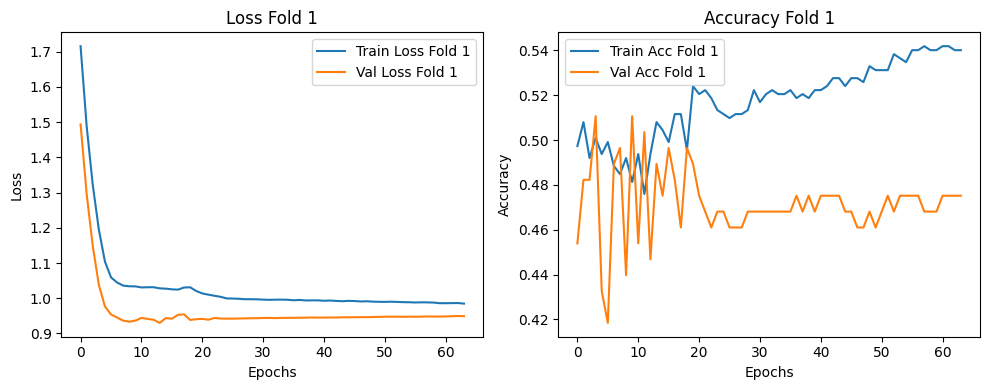

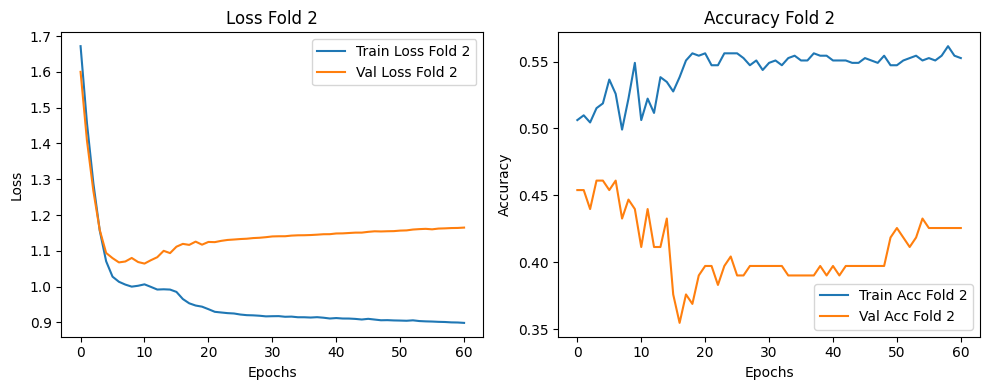

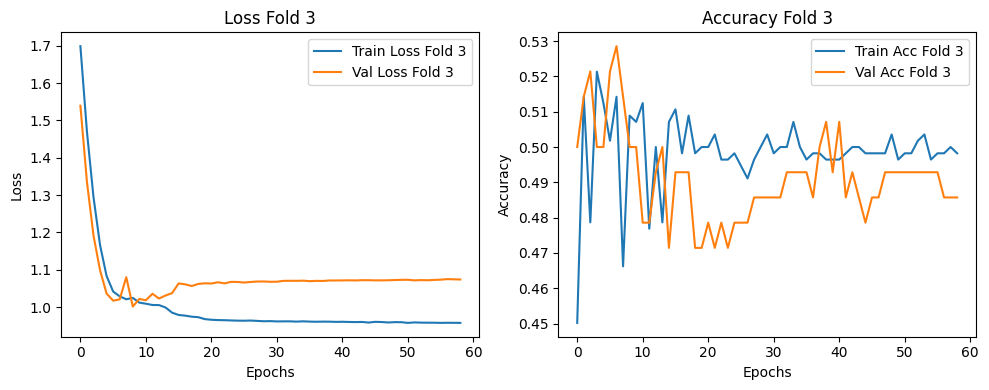

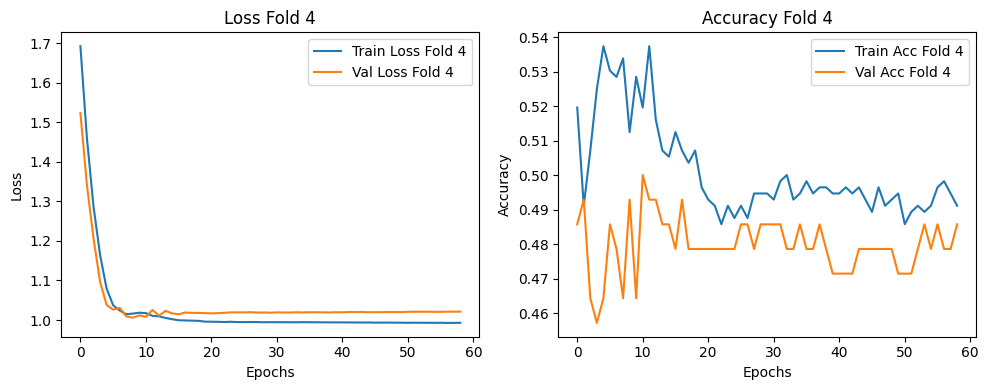

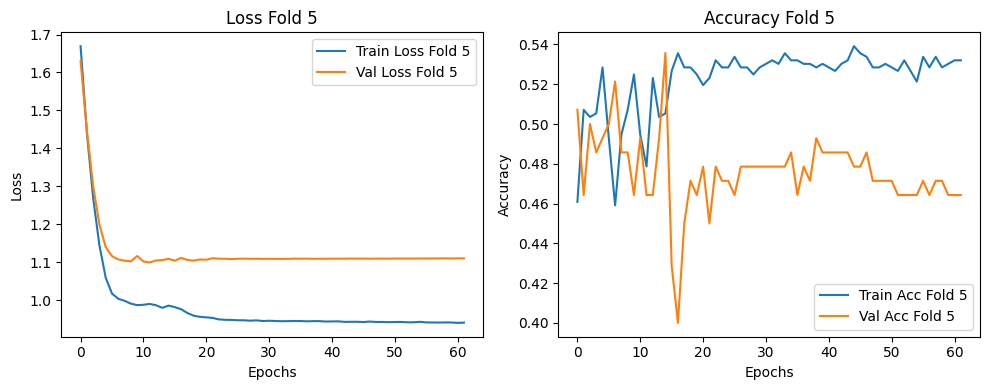

In [76]:
# จำนวน folds ที่จะใช้
kf = KFold(n_splits=fold, shuffle=True, random_state=42)

fold_no = 1
val_acc_per_fold = []
val_loss_per_fold = []

# เก็บค่า loss และ accuracy แต่ละ fold
train_loss_all_folds = []
val_loss_all_folds = []
train_acc_all_folds = []
val_acc_all_folds = []

early_stopping = EarlyStopping(monitor='val_loss', patience=pat, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# เริ่มต้น cross-validation
for train_index, val_index in kf.split(x_train):
    print(f'Training fold {fold_no}...')

    # แบ่งข้อมูลฝึก (train) และข้อมูลทดสอบ (validation)
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialising the RNN model ใหม่ในแต่ละ fold
    model = Sequential()
    model.add(Bidirectional(LSTM(64, input_shape=(window_length, number_of_features), return_sequences=True)))
    model.add(Dropout(DP))
    model.add(Bidirectional(LSTM(32, return_sequences=False)))
    model.add(Dropout(DP))
    # model.add(Bidirectional(LSTM(64, return_sequences=True)))
    # model.add(Bidirectional(LSTM(32, return_sequences=False)))
    # model.add(Dropout(DP))
    model.add(Dense(32, kernel_regularizer=regularizers.l1(L_REG)))
    model.add(Dense(number_of_features))

    model.compile(optimizer=Adam(learning_rate=learning), loss='mse', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train_fold, y_train_fold,
                        validation_data=(x_val_fold, y_val_fold),
                        batch_size=64,
                        epochs=epo,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=2)

    # เก็บค่าของ validation loss และ accuracy
    val_acc_per_fold.append(history.history['val_accuracy'][-1])
    val_loss_per_fold.append(history.history['val_loss'][-1])

    # เก็บค่าของ training loss และ accuracy แต่ละ fold
    train_loss_all_folds.append(history.history['loss'])
    val_loss_all_folds.append(history.history['val_loss'])
    train_acc_all_folds.append(history.history['accuracy'])
    val_acc_all_folds.append(history.history['val_accuracy'])

    print(f"Fold {fold_no} - val_accuracy: {history.history['val_accuracy'][-1]} - val_loss: {history.history['val_loss'][-1]}")

    # เพิ่ม fold count
    fold_no += 1

# สรุปผลการ cross-validation
print(f'Average validation accuracy: {np.mean(val_acc_per_fold)}')
print(f'Average validation loss: {np.mean(val_loss_per_fold)}')

# พล็อตกราฟ train_loss vs val_loss สำหรับแต่ละ fold
for i in range(len(train_loss_all_folds)):
    plt.figure(figsize=(10, 4))

    # Plot for loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_all_folds[i], label=f'Train Loss Fold {i+1}')
    plt.plot(val_loss_all_folds[i], label=f'Val Loss Fold {i+1}')
    plt.title(f'Loss Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_all_folds[i], label=f'Train Acc Fold {i+1}')
    plt.plot(val_acc_all_folds[i], label=f'Val Acc Fold {i+1}')
    plt.title(f'Accuracy Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Predict new

In [73]:
next_Date = '11/04/2023'
print('-' * 40)
print('Predict the Future Drawing on April 11, 2023')
next = df.copy()
next = next.tail((window_length))
next = np.array(next)
x_next = scaler.transform(next)
y_next_pred = model.predict(np.array([x_next]))
print('Drawing  Date', next_Date)
print('Prediction without rounding up or down:\t', scaler.inverse_transform(y_next_pred).astype(int)[0])
print('Prediction with rounding up           :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]+1)
print('Prediction with rounding down         :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]-1)
print('-' * 40)

----------------------------------------
Predict the Future Drawing on April 11, 2023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
Drawing  Date 11/04/2023
Prediction without rounding up or down:	 [506  52]
Prediction with rounding up           :	 [507  53]
Prediction with rounding down         :	 [505  51]
----------------------------------------


### Predict the Future Drawing Results on June 1, 2o24

In [77]:
next_Date = '2024-09-1'
print('-' * 40)
print('Predict the Future Drawing on',next_Date)

# Copy and prepare the data for prediction
next = df.copy()
next = next.tail(window_length)
next = np.array(next)
x_next = scaler.transform(next)

# Predict the next values
y_next_pred = model.predict(np.array([x_next]))

# Filter the actual values based on the next date
filtered_df = lt_2[lt_2['Date'] == next_Date]

# Extract the actual values and convert them to a list
actual_values = filtered_df[['top3', 'up2']].values.flatten().astype(int).tolist()

# Calculate the absolute difference
prediction = scaler.inverse_transform(y_next_pred).astype(int)[0].tolist()
diff = [abs(pred - actual) for pred, actual in zip(prediction, actual_values)]

# Print the results
print('Drawing  Date', next_Date)
print('Prediction:\t', prediction)
print('GoundTruth:\t', actual_values)
print('Diff:   \t', diff)
print('-' * 40)

----------------------------------------
Predict the Future Drawing on 2024-09-1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Drawing  Date 2024-09-1
Prediction:	 [516, 51]
GoundTruth:	 [606, 94]
Diff:   	 [90, 43]
----------------------------------------


# Evaluate

In [ ]:
evalu = {
    'รอบที่': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'บน': [420, 668, 448, 294, 281, 481, 288, 545, 542, 596],
    'ล่าง': [77, 66, 62, 53, 67, 65, 49, 84, 74, 64],
    'accuracy': [0.9626, 0.9482, 0.9626, 0.964, 0.9698, 0.9712, 0.954, 0.9583, 0.9727, 0.9482]
}

# Convert dictionary to DataFrame
evaluate = pd.DataFrame(evalu)

In [ ]:
df = evaluate.copy()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=evaluate['ล่าง'])
plt.title('Boxplot of ล่าง')
plt.ylabel('ล่าง')
plt.show()

In [ ]:
# Calculate descriptive statistics
min_value = df['ล่าง'].min()
max_value = df['ล่าง'].max()
mean_value = df['ล่าง'].mean()
q1 = df['ล่าง'].quantile(0.25)
q2 = df['ล่าง'].median()
q3 = df['ล่าง'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['ล่าง'][(df['ล่าง'] < lower_bound) | (df['ล่าง'] > upper_bound)]

# Print the results
print(f'Min value: {min_value}')
print(f'Max value: {max_value}')
print(f'Mean value: {mean_value}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Outliers: {outliers.values}')

In [ ]:
# Calculate descriptive statistics for 'บน'
min_value = df['บน'].min()
max_value = df['บน'].max()
mean_value = df['บน'].mean()
q1 = df['บน'].quantile(0.25)
q2 = df['บน'].median()
q3 = df['บน'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine outliers for 'บน'
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['บน'][(df['บน'] < lower_bound) | (df['บน'] > upper_bound)]

# Print the results for 'บน'
print(f'Min value: {min_value}')
print(f'Max value: {max_value}')
print(f'Mean value: {mean_value}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Outliers: {outliers.values}')

# tranformers

In [ ]:
fold = 10
L_REG = 0.001
pat = 180
epo = 200
learning = 0.001
DP = 0.02

In [ ]:
# from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, LayerNormalization, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# # เปลี่ยนจาก LSTM เป็น Transformer model
# def build_transformer_model(input_shape, number_of_features, L_REG, DP):
#     inputs = Input(shape=input_shape)

#     # Multi-Head Attention layer
#     attention_output = MultiHeadAttention(num_heads=8, key_dim=number_of_features)(inputs, inputs)
#     attention_output = LayerNormalization()(attention_output)

#     # Feed Forward Network
#     x = Dense(240, activation='relu', kernel_regularizer=regularizers.l1(L_REG))(attention_output)
#     x = Dropout(DP)(x)
#     x = Dense(240, activation='relu', kernel_regularizer=regularizers.l1(L_REG))(x)
#     x = Dropout(DP)(x)

#     # Output layer
#     outputs = Dense(number_of_features)(x)

#     model = Model(inputs, outputs)
#     model.compile(optimizer=Adam(learning_rate=learning), loss='mse', metrics=['accuracy'])
#     return model

# # cross-validation setup (เหมือนเดิม)
# kf = KFold(n_splits=fold, shuffle=True, random_state=42)

# fold_no = 1
# val_acc_per_fold = []
# val_loss_per_fold = []

# train_loss_all_folds = []
# val_loss_all_folds = []
# train_acc_all_folds = []
# val_acc_all_folds = []

# # เริ่มต้น cross-validation
# for train_index, val_index in kf.split(x_train):
#     print(f'Training fold {fold_no}...')

#     # แบ่งข้อมูลฝึก (train) และข้อมูลทดสอบ (validation)
#     x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # สร้าง Transformer model สำหรับแต่ละ fold
#     model = build_transformer_model((window_length, number_of_features), number_of_features, L_REG, DP)

#     # Train the model
#     history = model.fit(x_train_fold, y_train_fold,
#                         validation_data=(x_val_fold, y_val_fold),
#                         batch_size=128,
#                         epochs=epo,
#                         callbacks=[early_stopping, reduce_lr],
#                         verbose=2)

#     # เก็บค่าของ validation loss และ accuracy
#     val_acc_per_fold.append(history.history['val_accuracy'][-1])
#     val_loss_per_fold.append(history.history['val_loss'][-1])

#     # เก็บค่าของ training loss และ accuracy แต่ละ fold
#     train_loss_all_folds.append(history.history['loss'])
#     val_loss_all_folds.append(history.history['val_loss'])
#     train_acc_all_folds.append(history.history['accuracy'])
#     val_acc_all_folds.append(history.history['val_accuracy'])

#     print(f"Fold {fold_no} - val_accuracy: {history.history['val_accuracy'][-1]} - val_loss: {history.history['val_loss'][-1]}")

#     # เพิ่ม fold count
#     fold_no += 1

# # สรุปผลการ cross-validation
# print(f'Average validation accuracy: {np.mean(val_acc_per_fold)}')
# print(f'Average validation loss: {np.mean(val_loss_per_fold)}')

# # พล็อตกราฟ train_loss vs val_loss สำหรับแต่ละ fold
# for i in range(len(train_loss_all_folds)):
#     plt.figure(figsize=(10, 4))

#     # Plot for loss
#     plt.subplot(1, 2, 1)
#     plt.plot(train_loss_all_folds[i], label=f'Train Loss Fold {i+1}')
#     plt.plot(val_loss_all_folds[i], label=f'Val Loss Fold {i+1}')
#     plt.title(f'Loss Fold {i+1}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Plot for accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(train_acc_all_folds[i], label=f'Train Acc Fold {i+1}')
#     plt.plot(val_acc_all_folds[i], label=f'Val Acc Fold {i+1}')
#     plt.title(f'Accuracy Fold {i+1}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()


### Prediction without rounding up or down the results

In [ ]:
print('-' * 40)
print('Prediction vs. GoundTruth without rounding up or down')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0])
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

### Prediction with rounding up the results

In [ ]:
print('-' * 40)
print('Prediction vs. GoundTruth with rounding up')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0]+1)
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)